In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
samples = pd.read_csv(r'I:\Current_Projects\NURE_Reprocessing\selected_samples.csv')
nure = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\Spreadsheets\nure.csv')
imputed = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\Spreadsheets\nure_imputed.csv', index_col=[0])

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


create datasets for the nure/both samples and the imputed/both samples

In [3]:
imputed = pd.merge(imputed, nure, on=['latitude', 'longitude'], how='inner')

In [4]:
nure_comb = nure[nure['rec_no'].isin(samples[(samples['_merge']=='right_only') | (samples['_merge']=='both')].rec_no)]
imputed_comb = imputed[imputed['rec_no'].isin(samples[(samples['_merge']=='left_only') | (samples['_merge']=='both')].rec_no)]

imputed_e = imputed_comb.iloc[:,:51]
imputed_e['rec_no'] = imputed_comb.rec_no

nure_ec = nure_comb.iloc[:,81:138]
nure_ec['rec_no'] =nure_comb.rec_no
nure_ec.drop(['u_ms_ppm','u_na_ppm', 'br_ppm', 'f_ppm', 'hg_ppm', 'pt_ppm'], axis=1, inplace=True)

create a `both` dataset for imputed and nure data

In [5]:
nure_both = nure[nure['rec_no'].isin(samples[(samples['_merge']=='both')].rec_no)]
imputed_both = imputed[imputed['rec_no'].isin(samples[(samples['_merge']=='both')].rec_no)]
imputed_eb = imputed_both.iloc[:,:51]
imputed_eb['rec_no'] = imputed_both.rec_no
nure_eb = nure_both.iloc[:,81:138]
nure_eb['rec_no'] =nure_both.rec_no
nure_eb.drop(['u_ms_ppm','u_na_ppm', 'br_ppm', 'f_ppm', 'hg_ppm', 'pt_ppm'], axis=1, inplace=True)

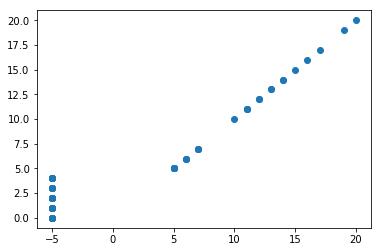

In [6]:
selected = 9
plt.scatter(nure_eb.iloc[:,selected], imputed_eb.iloc[:,selected])

create an `only` dataset for imputed and nure data

In [7]:
nure_only = nure[nure['rec_no'].isin(samples[(samples['_merge']=='right_only')].rec_no)]
imputed_only = imputed[imputed['rec_no'].isin(samples[(samples['_merge']=='left_only')].rec_no)]

imputed_eo = imputed_only.iloc[:,:51]
imputed_eo['rec_no'] = imputed_only.rec_no

nure_eo = nure_only.iloc[:,81:138]
nure_eo['rec_no'] =nure_only.rec_no
nure_eo.drop(['u_ms_ppm','u_na_ppm', 'br_ppm', 'f_ppm', 'hg_ppm', 'pt_ppm'], axis=1, inplace=True)